### Tarea 1
#### Métodos de Aprendizajes de Máquinas en Data Science

Integrantes: Sofía Álvarez, Sebastián Dinator.

In [1]:
#Instalando las librerias requeridas
#import sys
#!{sys.executable} -m pip install numpy pandas plotnine sklearn

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#Graficos
from plotnine import ggplot
from plotnine import *

In [4]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.24.3


# Problema 1
## Limpieza de Datos

In [5]:
# Importando la data
df = pd.read_csv('dataTaxi.csv')
df

,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,DoW,Hora_Inicio,Hora_Fin,distKilometros
0,1,-33.484436,-70.734913,-33.437822,-70.647421,1,sÃ¡bado,01-03-14 01:28,01-03-14 01:59,9.640889
1,3,-33.523092,-70.782872,-33.437234,-70.647150,0,sÃ¡bado,01-03-14 00:04,01-03-14 00:44,15.816194
2,4,-33.455709,-70.631109,-33.437341,-70.647136,0,sÃ¡bado,01-03-14 00:33,01-03-14 00:42,2.529204
3,5,-33.294220,-70.883511,-33.437682,-70.647190,0,sÃ¡bado,01-03-14 00:20,01-03-14 00:56,27.161926
4,6,-33.437601,-70.647152,-33.294479,-70.883178,10,sÃ¡bado,01-03-14 10:16,01-03-14 10:53,27.117458
...,...,...,...,...,...,...,...,...,...,...
452161,630819,-33.410845,-70.587625,-33.403157,-70.794847,23,domingo,31-07-16 23:18,31-07-16 23:44,19.275570
452162,630820,-33.378059,-70.659924,-33.410613,-70.794746,22,domingo,31-07-16 22:43,31-07-16 23:06,13.044041
452163,630821,-33.579867,-70.705105,-33.402888,-70.794640,23,domingo,31-07-16 23:02,31-07-16 23:33,21.382867
452164,630822,-33.396931,-70.792297,-33.433149,-70.624117,22,domingo,31-07-16 22:31,31-07-16 23:02,16.138766


In [6]:
print('Tipos de datos:')
display(df.dtypes)
print('Descripción de los datos:')
display(df.describe())

Tipos de datos:


Unnamed: 0          int64
LatitudPAB        float64
LongitudPAB       float64
LatitudCOM        float64
LongitudCOM       float64
Horas               int64
DoW                object
Hora_Inicio        object
Hora_Fin           object
distKilometros    float64
dtype: object

Descripción de los datos:


,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,distKilometros
count,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000
mean,315556.037500,-33.436718,-70.655944,-33.442694,-70.660850,11.793052,10.598621
std,181053.682589,0.055233,0.074918,0.060474,0.077424,6.895245,7.393171
min,1.000000,-33.868754,-70.979306,-33.869713,-70.979998,0.000000,0.030007
25%,160921.250000,-33.453083,-70.699870,-33.458440,-70.712886,7.000000,4.548679
50%,317026.000000,-33.433158,-70.646739,-33.436642,-70.650034,12.000000,9.529020
75%,470740.750000,-33.403836,-70.601023,-33.405790,-70.601565,18.000000,16.008261
max,630823.000000,-33.150050,-70.403065,-33.150720,-70.407848,23.000000,65.847860


### Resumen:
* 7 variables numéricas
* 3 variables categóricas

In [7]:
# La variable 'Unnamed: 0' no aporta información, ya que es un tipo de ID, porque cada punto del data
# frame tiene un valor distinto. Por lo que será eliminada.
(len(df['Unnamed: 0'].unique()) == len(df))

True

In [8]:
# Revisar la existencia de nulos
print(df.isnull().sum())

Unnamed: 0        0
LatitudPAB        0
LongitudPAB       0
LatitudCOM        0
LongitudCOM       0
Horas             0
DoW               0
Hora_Inicio       0
Hora_Fin          0
distKilometros    0
dtype: int64


#### No existen datos nulos, por lo que, hasta el moemnto, no es necesario descartar ninguna variable. 

### Revisando las variables

In [9]:
# Day of Week
display(df['DoW'].unique())

array(['sÃ¡bado', 'domingo', 'lunes', 'martes', 'miÃ©rcoles', 'jueves',
       'viernes'], dtype=object)

In [10]:
# Se reemplazan los nombres que están mal escritos
df['DoW'] = df['DoW'].str.replace('sÃ¡bado', 'sabado')
df['DoW'] = df['DoW'].str.replace('miÃ©rcoles', 'miercoles')

### Se decidió que las 4 columnas de longitud y latitud son importantes, ya que brindan información sobre el espacio de los viajes, que es fundamental para encontrar patrones.
### También, se define que las variables DoW, Hora_inicio y Hora_Fin son significativas para encontrar patrones de viaje, porque aportan información temporal de los viajes, no obstante, conservar la fecha y los minutos puede provocar overfitting, es por esto que solo se conservará la hora.
### Por último, se conserva la variable distKilometros porque, por ejemplo, podría ocurrir que se encuentra el siguiente patrón: 'Todos lo sábados a las 10 am de realizan viajes de 8 km en x sector'.

In [11]:
# Hora_Fin
# Convirtiendo a formato datetime
df['Hora_Fin'] = pd.to_datetime(df['Hora_Fin'], format='%d-%m-%y %H:%M')
# Dejando solo la hora
df['Fin'] = df['Hora_Fin'].dt.hour

In [12]:
# La columna Hora_Inicio será eliminada y se reutilizará la variable Horas
df.rename(columns={'Horas': 'Inicio'}, inplace=True)

## Estandarizando
### Debido a que las variables escogidas tienen diferente escala y orden de magnitud se ha decidido estandarizar.

In [13]:
scaler = StandardScaler()
data = scaler.fit_transform(df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros']])
data_estandarizada = pd.DataFrame(data, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros'])
display(data_estandarizada.head(5))

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470
3,2.579938,-3.037538,0.082890,0.176426,-1.710319,-1.694343,2.240354
4,-0.015977,0.117358,2.450896,-2.871585,-0.260042,-0.269221,2.234340


In [14]:
# Se agrega la variables DoW al set de datos.
data_estandarizada['DoW'] = df['DoW']
display(data_estandarizada.head(3))

# Como la variable DoW es categórica se utiliza el método one hot encoding para transformarla en numérica,
# si bien, la dimensión aumentará, se considera que es información significativa.
data_encoded = pd.get_dummies(data_estandarizada, columns=['DoW'])
data_encoded.head(3)

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,sabado
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,sabado
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,sabado


,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW_domingo,DoW_jueves,DoW_lunes,DoW_martes,DoW_miercoles,DoW_sabado,DoW_viernes
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,0,0,0,0,0,1,0
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,0,0,0,0,0,1,0
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,0,0,0,0,0,1,0


# Problema 2
## K-Means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[3543950.7670103493, 2855431.941327844, 2542728.8473303188, 2293577.2400376075, 2108941.6559735583, 1954477.7889411612, 1854626.2394199828, 1768615.66881292, 1696534.4562910898, 1638813.7130966359, 1584366.0612751227, 1541867.434048884, 1501863.4374411907, 1467302.0024358362, 1433567.5707852584, 1405168.8469488325, 1378916.455176997, 1355601.2565729343, 1332206.7846520701]


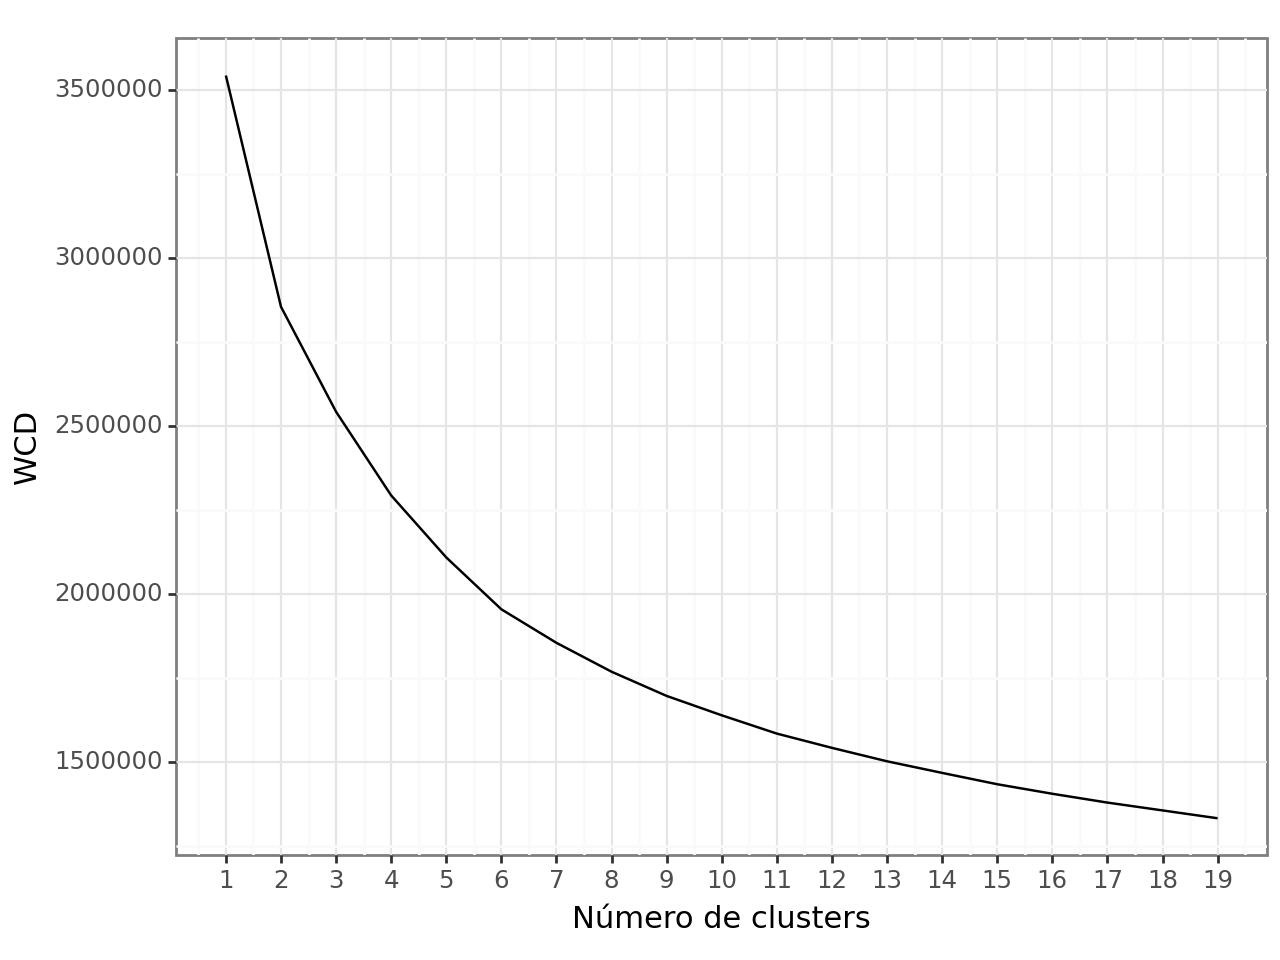

<Figure Size: (640 x 480)>

In [15]:

sse = []
numK = 20
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=100)
    kmeans.fit(data_encoded)
    print(k)
    sse.append(kmeans.inertia_)

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

#### Teniendo en consideración la dimensión de los datos, el gráfico anterior y el objetivo final del trabajo, nos parece que el codo presente en 6 clusters es el más relevante.

In [16]:
# Creando el modelo
km = KMeans(n_clusters=6)  
print(km)

# Entrenando el modelo
km=km.fit(data_encoded)
print(km)

KMeans(n_clusters=6)


C:\Users\sebad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=6)


In [17]:
from sympy import Matrix
print('Centroides por variable:')
Matrix(km.cluster_centers_) #Mostrando los centros de los clusters

Centroides por variable:


Matrix([
[ -2.09462681606659,  -0.20184851923653, -0.312114834340515, -0.0767100071332105, -0.246369746967525, -0.198372438936747,  0.365723068346367, 0.0698448884716815,  0.17220955701578,  0.182580126056056, 0.173885834339099, 0.169751016941577, 0.0799249027759147, 0.151803674399895],
[ 0.164933340395791, -0.333583503298544,  0.104598194948994,  0.0562102086773545,   -1.2387382968006,  -1.18665715020353, -0.240685740236456, 0.0696993008575221, 0.177964567730839, 0.0917256827386469, 0.156945041518651,  0.16707016313324,  0.138538814851696, 0.198056429169402],
[  0.88284325904627,  -1.47684087940632,  0.281856517442821,   0.167891685736247,  0.828990245755384,  0.719076622072261,  0.559254097639386, 0.0642620080965749, 0.198019621430396,  0.151920201320253, 0.167219811079907, 0.177978773842957, 0.0558007221269923, 0.184798862102924],
[ 0.149509147531159,  0.588224833340558,  0.675822705237549,   -1.49721638536552,  0.299762592697958,  0.291754276324942,  0.907564252302191, 0.0760765173

In [18]:
# Data frame con los datos etiquetados, es decir, asignados a un cluster (columna labels)
tempDF=pd.DataFrame(data_encoded,columns=data_encoded.columns)
tempDF['labels']=km.labels_
display(tempDF)

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW_domingo,DoW_jueves,DoW_lunes,DoW_martes,DoW_miercoles,DoW_sabado,DoW_viernes,labels
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,0,0,0,0,0,1,0,1
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,0,0,0,0,0,1,0,1
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,0,0,0,0,0,1,0,1
3,2.579938,-3.037538,0.082890,0.176426,-1.710319,-1.694343,2.240354,0,0,0,0,0,1,0,1
4,-0.015977,0.117358,2.450896,-2.871585,-0.260042,-0.269221,2.234340,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452161,0.468436,0.911923,0.653799,-1.730698,1.625317,1.583438,1.173645,1,0,0,0,0,0,0,3
452162,1.062036,-0.053113,0.530506,-1.729400,1.480290,1.583438,0.330768,1,0,0,0,0,0,0,3
452163,-2.591700,-0.656191,0.658238,-1.728029,1.625317,1.583438,1.458678,1,0,0,0,0,0,0,0
452164,0.720342,-1.820019,0.157853,0.474442,1.480290,1.583438,0.749361,1,0,0,0,0,0,0,2


### Se decide utilizar las variables de longitud y latitud para graficar los datos porque así se obtiene el mapa de santiago, facilitando la interpretación de los datos.

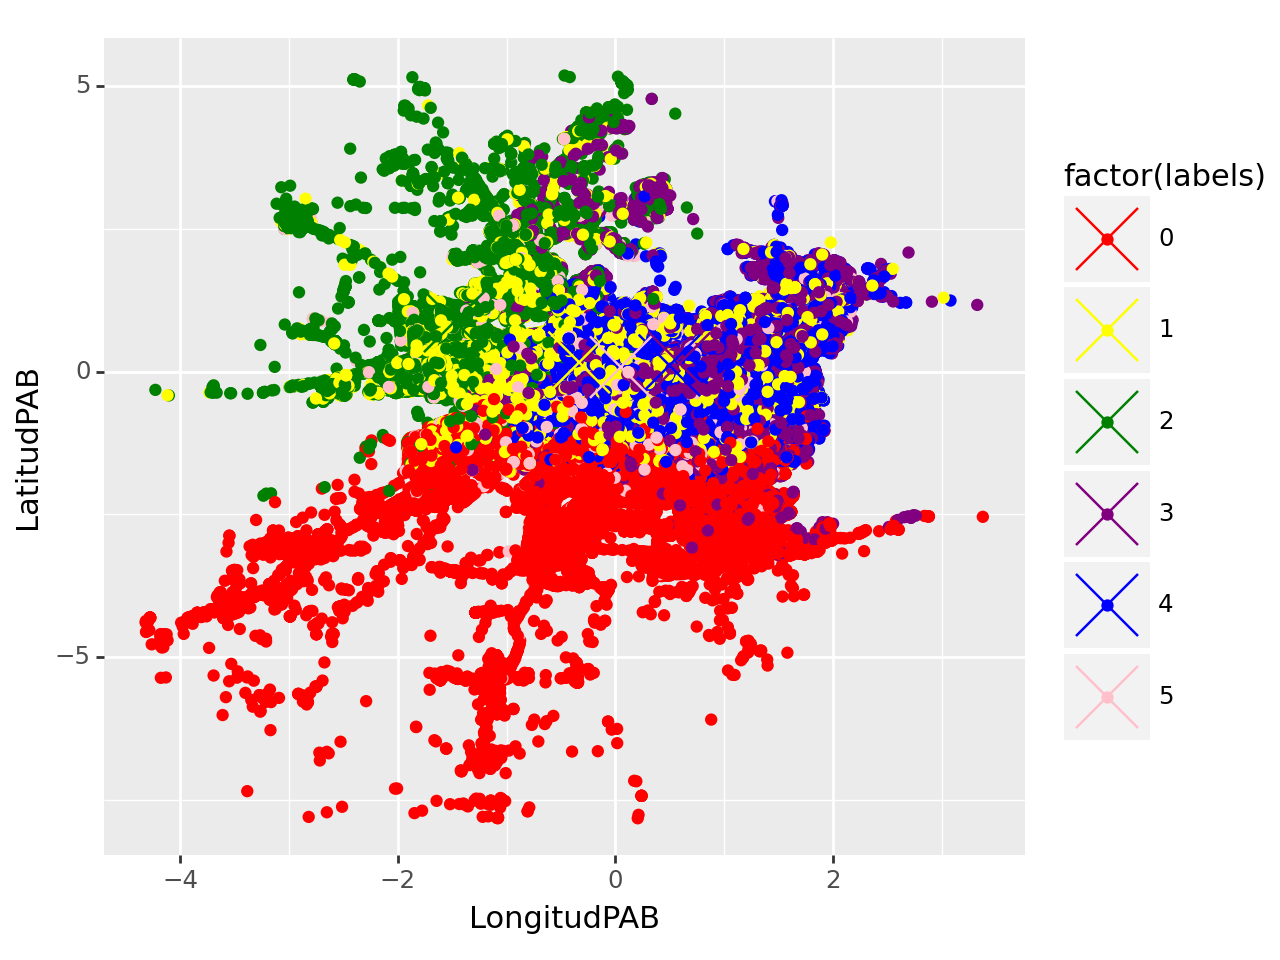

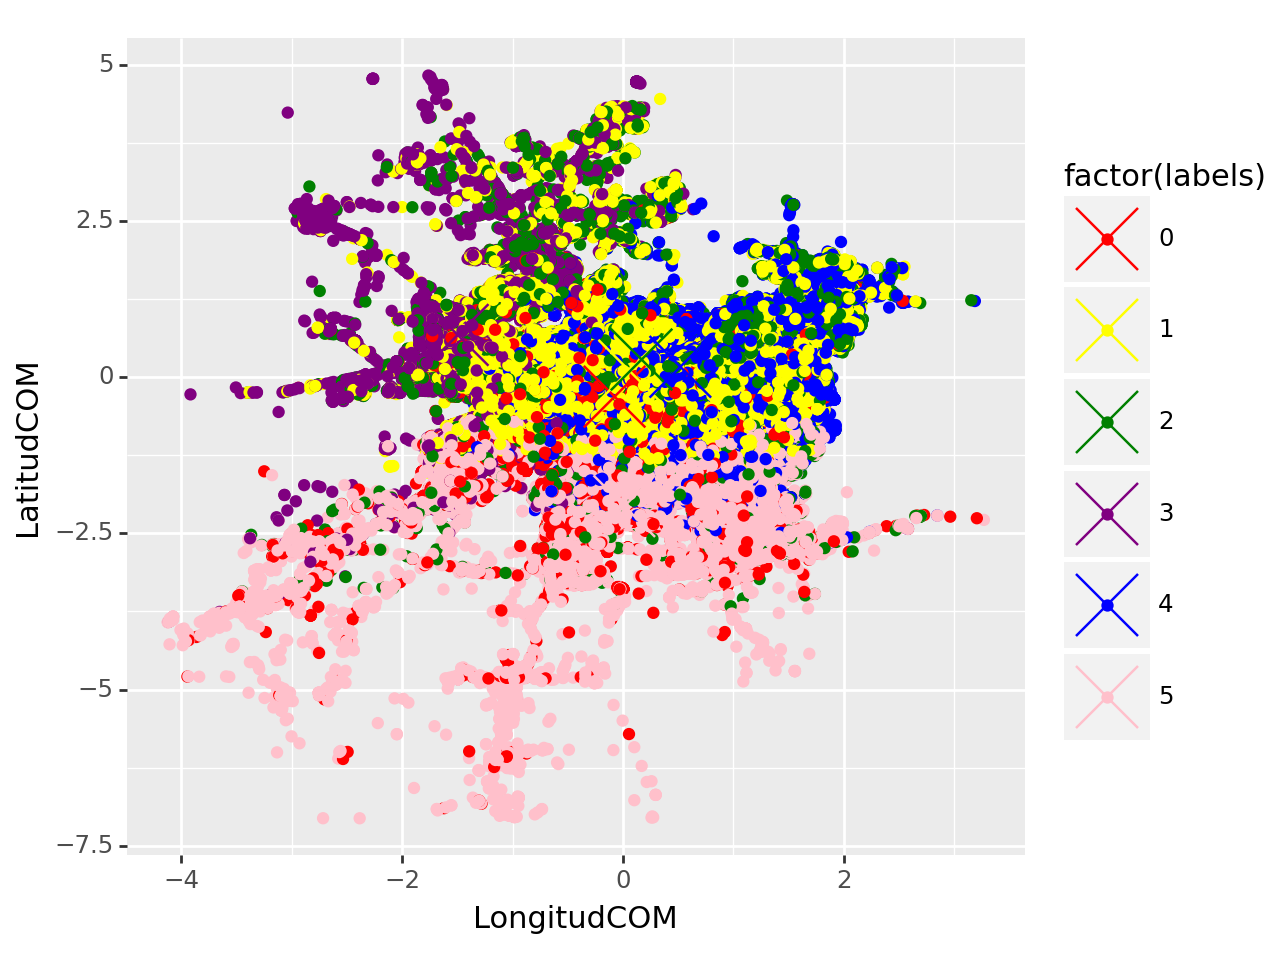

In [19]:
#Creando data frame con los centros y etiquetas
tempDF2=pd.DataFrame(km.cluster_centers_,columns=data_encoded.columns[0:14])
tempDF2['labels']=range(km.n_clusters)

#creando el gráfico
colores = ['red', 'yellow', 'green', 'purple', 'blue', 'pink'] # Paleta de colores

print(ggplot(tempDF)+aes(x="LongitudPAB", y="LatitudPAB",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12)+scale_color_manual(values=colores))
print(ggplot(tempDF)+aes(x="LongitudCOM", y="LatitudCOM",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12)+scale_color_manual(values=colores))

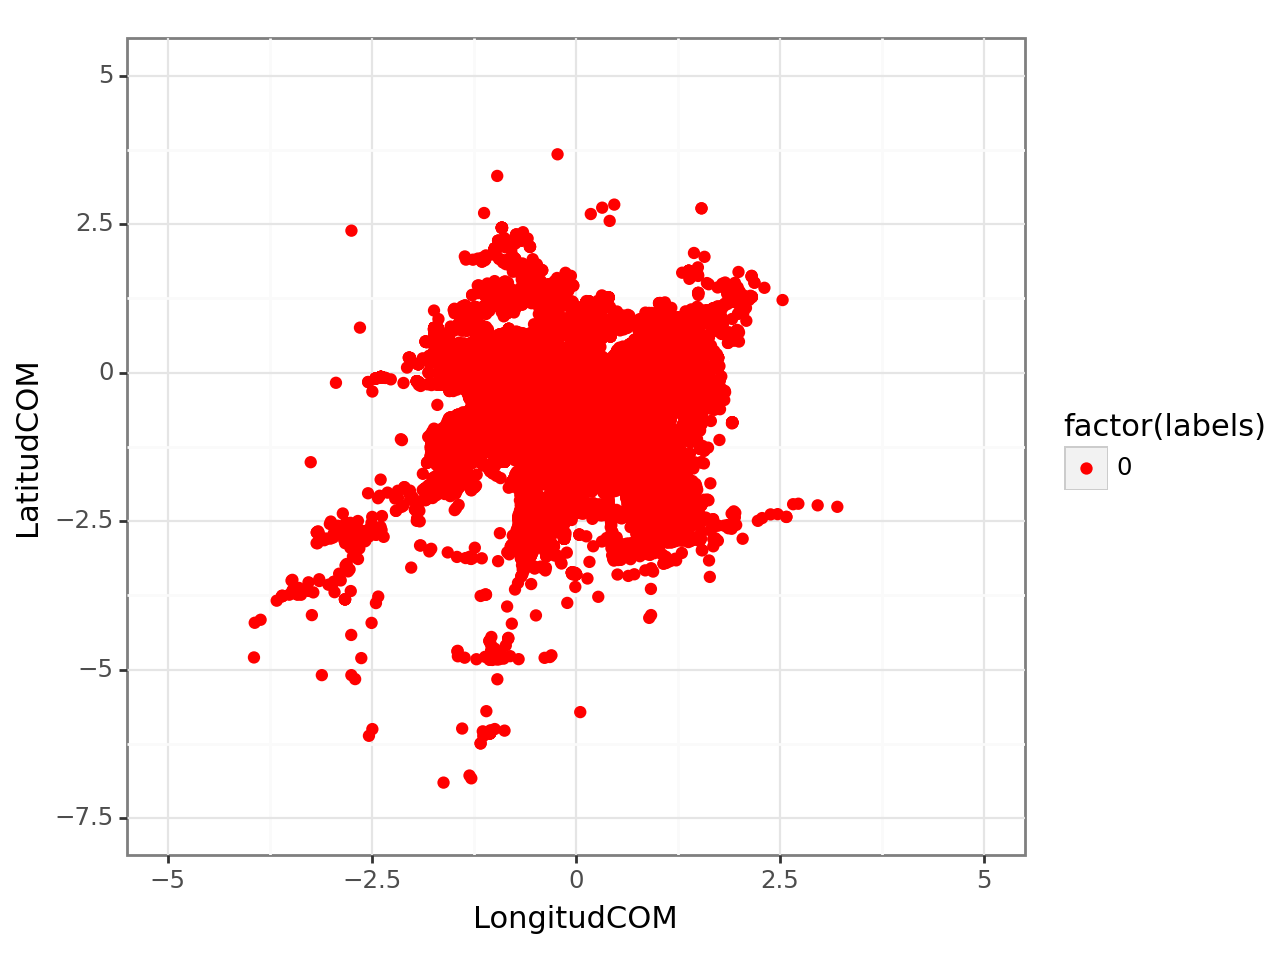

<Figure Size: (640 x 480)>

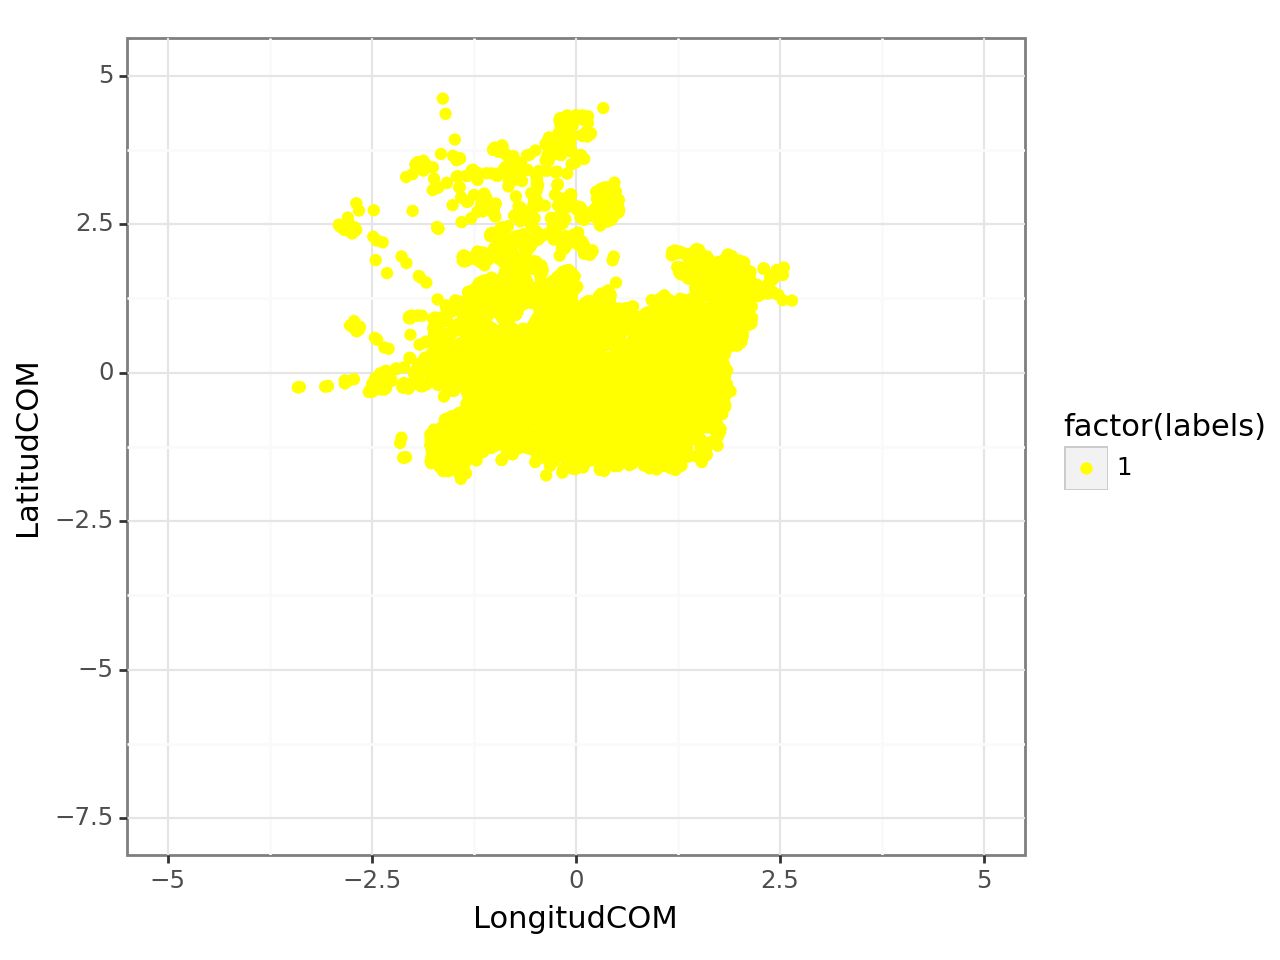

<Figure Size: (640 x 480)>

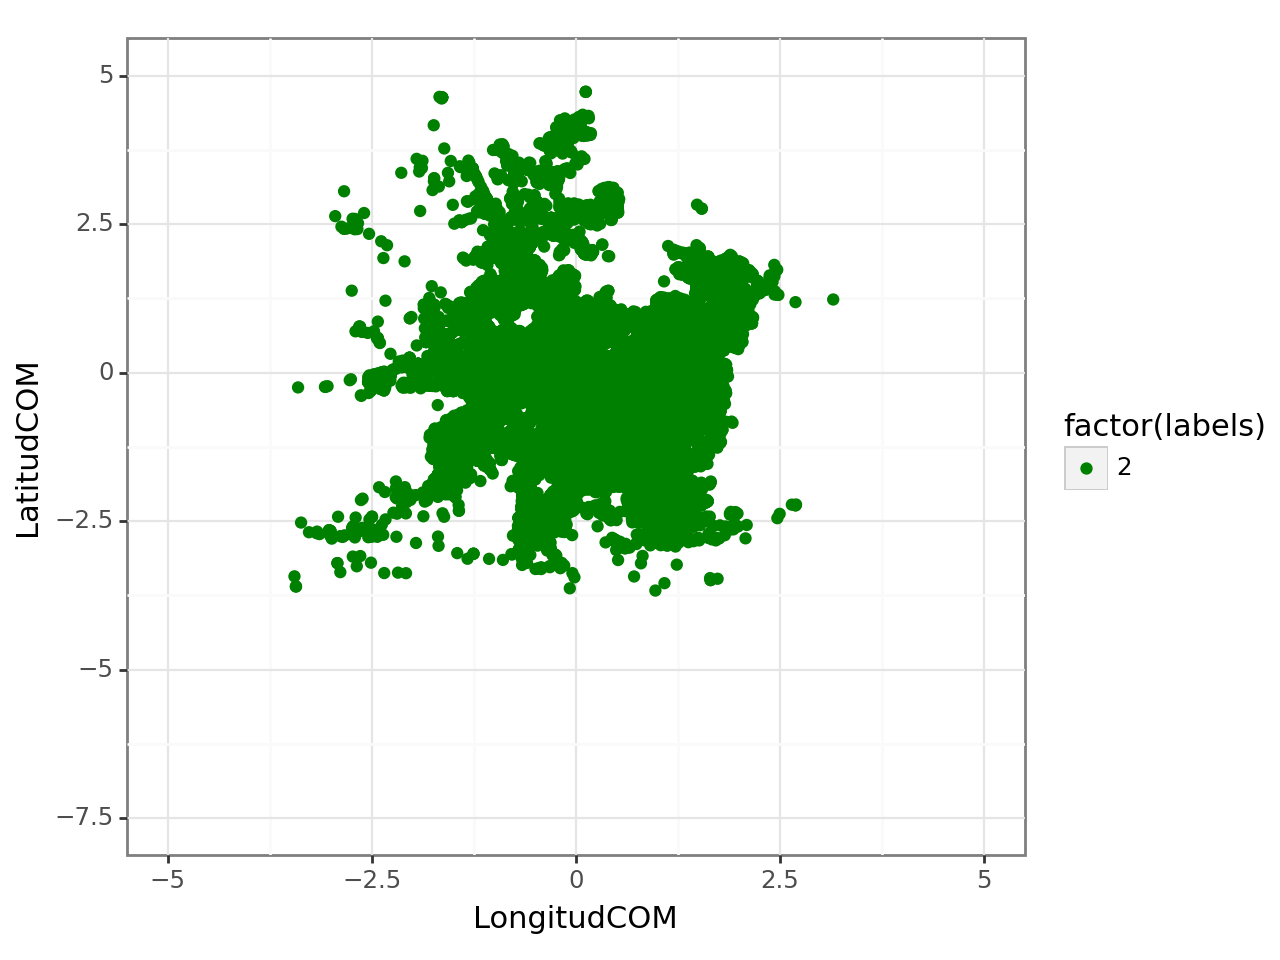

<Figure Size: (640 x 480)>

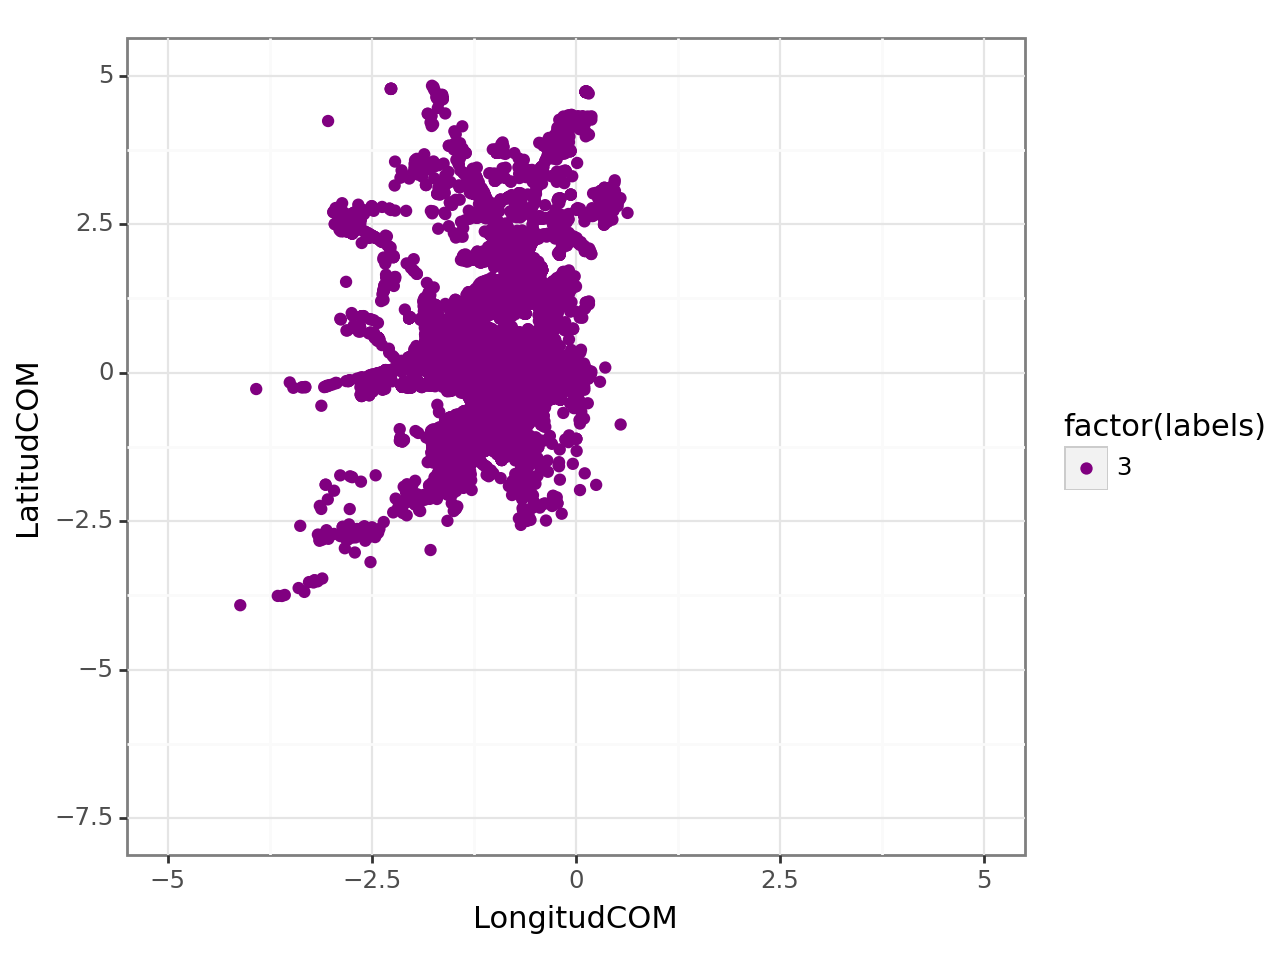

<Figure Size: (640 x 480)>

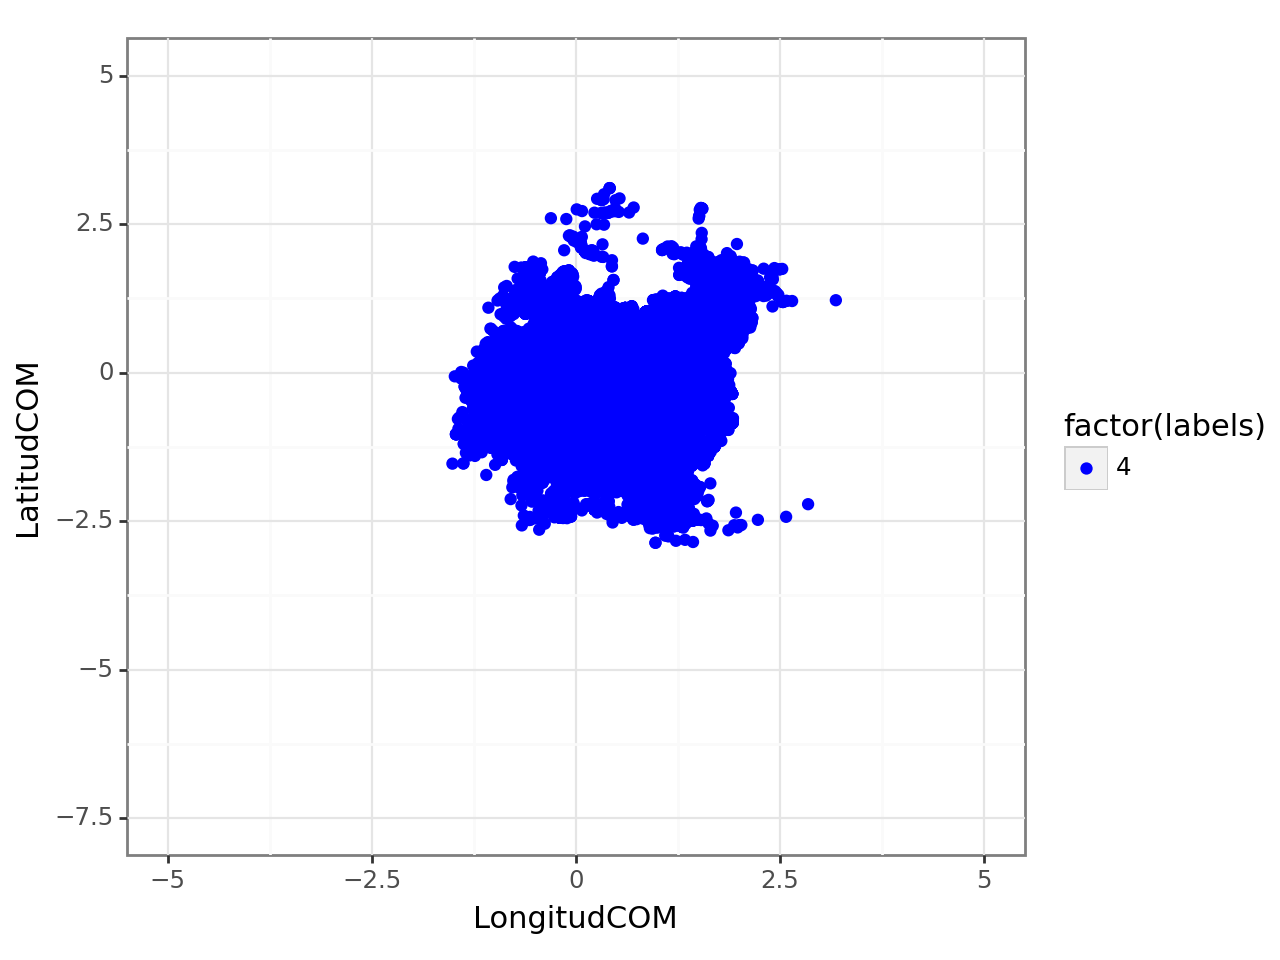

<Figure Size: (640 x 480)>

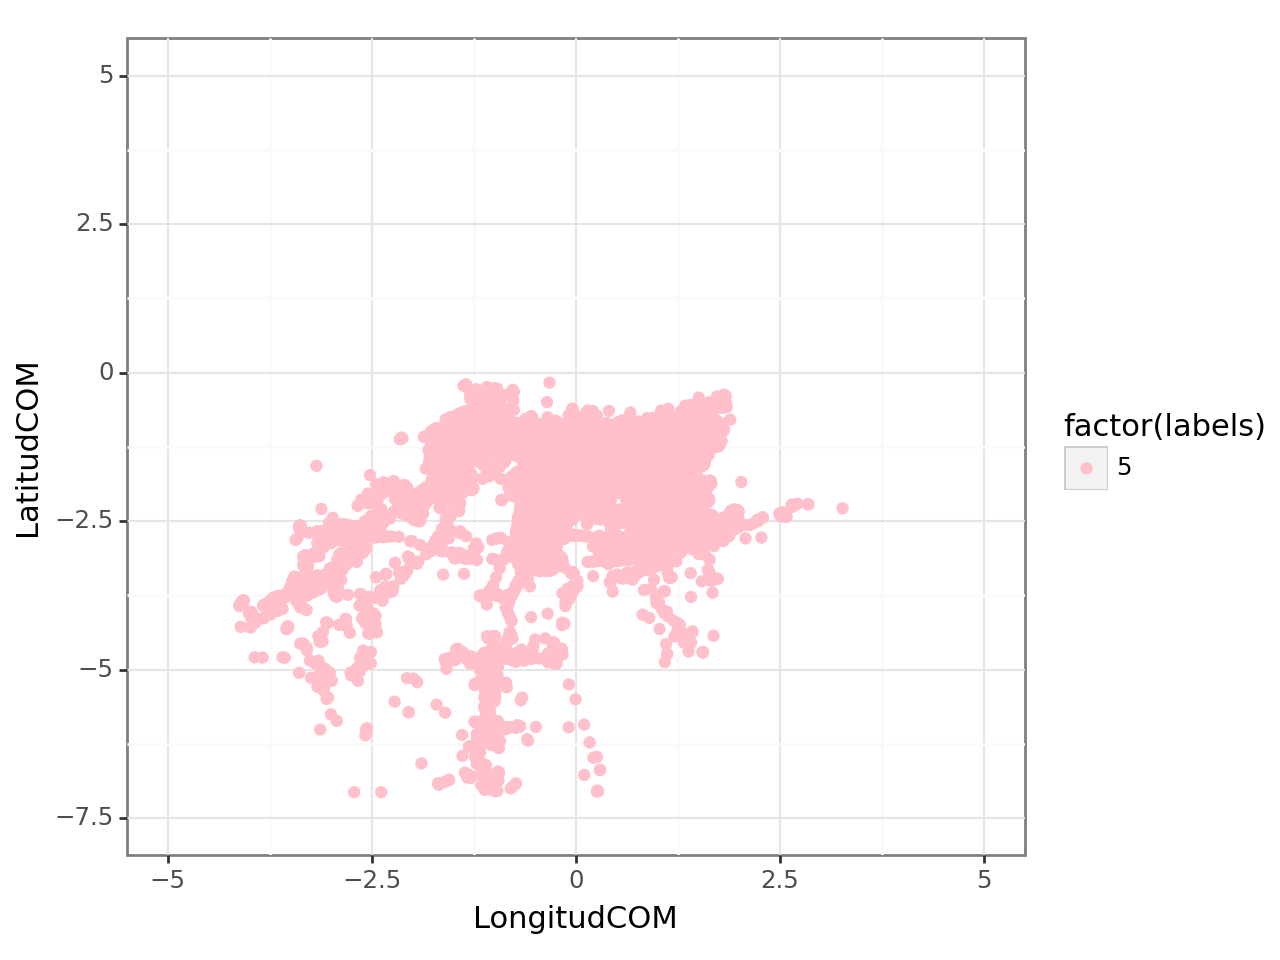

<Figure Size: (640 x 480)>

In [20]:
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    display(ggplot(cluster)+aes(x="LongitudCOM",y="LatitudCOM",color="factor(labels)")+geom_point(show_legend=True)+theme_bw()+scale_x_continuous(limits=(-5, 5))+scale_y_continuous(limits=(-7.5, 5))+scale_color_manual(values=colores[i]))
            
            
            

# Problema 3
## Un cluster es un grupo de datos que se caracterizan por compartir caracteristicas similares. En este caso se está buscando un patrón de viaje, por lo que, aquellos puntos que están etiquetados con el mismo número y representados del mismo color son parecidos en términos de distancia recorrida, hora de inicio y hora final, día de la semana y ubicación geográfica.
## En otras palabras, un ejemplo, es que el norte y sur de santiago tienen comportamientos distintos, porque en el sur hay un claro dominio del cluster 4.


# Problema 4) 
### Modifique k-means para que una vez que sea aplicado con un valor dado de k, analice cada cluster y, según alguna regla definida por usted, determine que clusters están mal definidos/incorrectos. Posteriormente, cada cluster incorrecto sepárelo en dos clusters y vuelva a correr k-means con el nuevo número de clusters y centroides. Repita este proceso hasta que todos los clusters encontrados sean considerados correctos.

In [21]:
WCD = []
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    cluster.drop(columns=['labels'], inplace=True)
    centroide = km.cluster_centers_[i]

    distancia_al_centroide = np.linalg.norm(cluster - centroide, axis=1)
    distancia_intra_cluster = np.sum(distancia_al_centroide)
    WCD.append(distancia_intra_cluster)
    


display(Matrix([round(numero) for numero in WCD]))

print("El promedio es:", round(sum(WCD) / len(WCD)))


C:\Users\sebad\AppData\Local\Temp\ipykernel_113644\3887056762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sebad\AppData\Local\Temp\ipykernel_113644\3887056762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sebad\AppData\Local\Temp\ipykernel_113644\3887056762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sebad\AppData\Local\Temp\ipykernel_113644\3887056762.py:4: SettingWithCopyWarning: 
A value is

Matrix([
[107939],
[179713],
[120881],
[123370],
[269569],
[ 88431]])

El promedio es: 148317


In [22]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_encoded, km.labels_))

0.3050846630180023
